In [1]:
import pandas as pd

df = pd.read_csv("spotify.csv")

In [2]:
from sklearn.preprocessing import StandardScaler

mood_features = ['valence', 'energy', 'danceability', 'tempo', 'acousticness']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[mood_features])

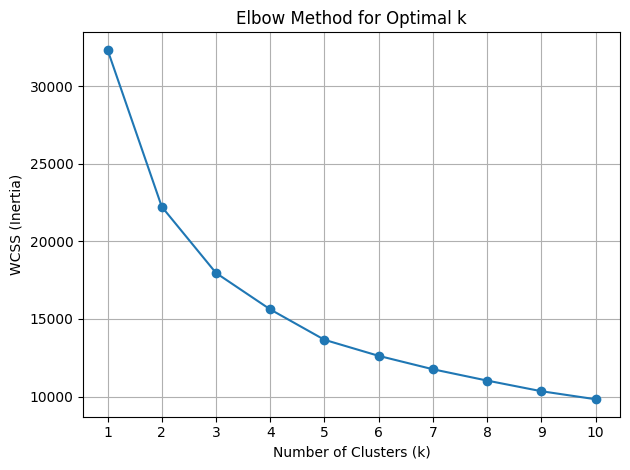

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)  
    wcss.append(kmeans.inertia_)

plt.plot(k_values, wcss, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(k_values)
plt.grid(True)
plt.tight_layout()
plt.show()


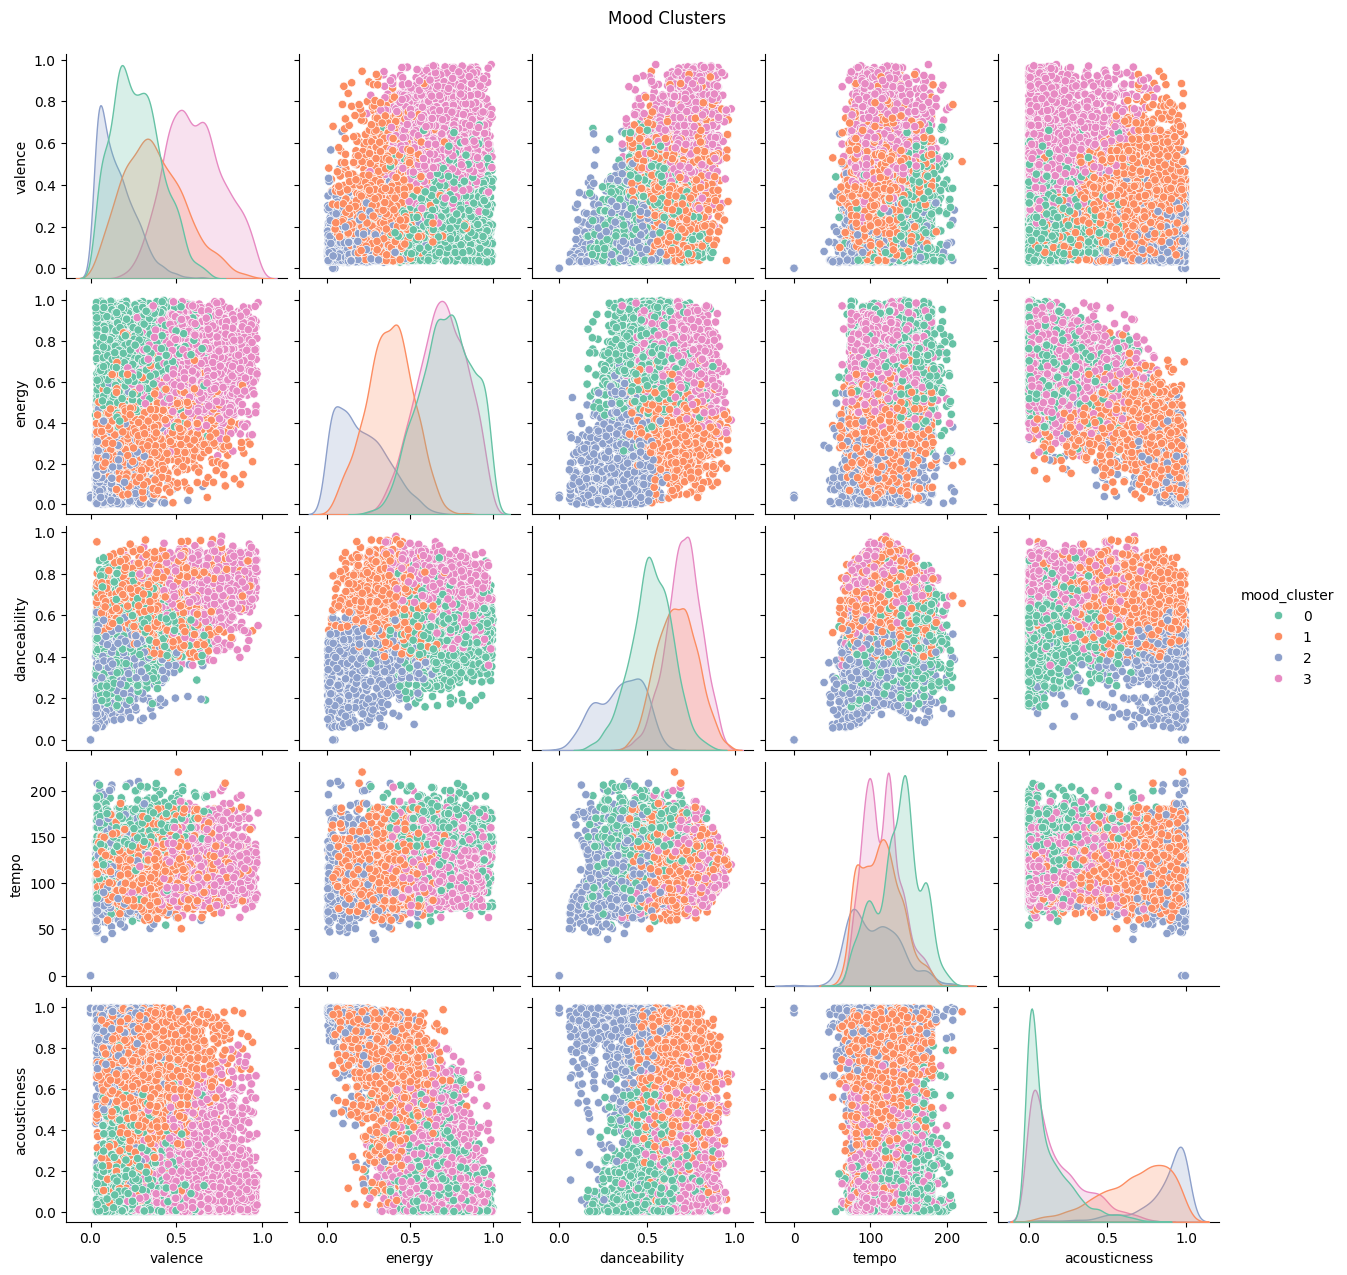

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

kmeans = KMeans(n_clusters=4, random_state=42)
df['mood_cluster'] = kmeans.fit_predict(X_scaled)

sns.pairplot(df, vars=mood_features, hue='mood_cluster', palette='Set2')
plt.suptitle("Mood Clusters", y=1.02)
plt.show()


In [5]:
df.groupby('mood_cluster')[['valence', 'energy', 'danceability', 'tempo', 'acousticness']].mean().round(2)


,valence,energy,danceability,tempo,acousticness
mood_cluster,,,,,
0,0.27,0.72,0.52,136.15,0.12
1,0.37,0.37,0.67,113.26,0.67
2,0.15,0.20,0.35,106.69,0.85
3,0.61,0.69,0.71,115.62,0.18


In [6]:
genre_cluster_counts = df.groupby(['mood_cluster', 'track_genre']).size().unstack().fillna(0)
genre_cluster_percent = genre_cluster_counts.div(genre_cluster_counts.sum(axis=1), axis=0).round(3)

for cluster in genre_cluster_percent.index:
    print(f"\n Cluster {cluster} — Top Genres:")
    top_genres = genre_cluster_percent.loc[cluster].sort_values(ascending=False).head(5)
    print(top_genres)



 Cluster 0 — Top Genres:
track_genre
dubstep        0.396
edm            0.113
house          0.097
alternative    0.083
sad            0.075
Name: 0, dtype: float64

 Cluster 1 — Top Genres:
track_genre
chill      0.329
sad        0.305
indie      0.146
pop        0.108
ambient    0.066
Name: 1, dtype: float64

 Cluster 2 — Top Genres:
track_genre
ambient    0.702
chill      0.099
indie      0.070
sad        0.054
pop        0.042
Name: 2, dtype: float64

 Cluster 3 — Top Genres:
track_genre
pop      0.170
house    0.153
edm      0.152
sad      0.148
chill    0.115
Name: 3, dtype: float64


In [7]:
mood_names = {
    0: "High-Energy Electronic",
    1: "Chill Indie",
    2: "Slow Sad Acoustic",
    3: "Danceable Pop Vibes"
}

df['playlist_name'] = df['mood_cluster'].map(mood_names)

In [8]:
df[['track_name', 'artists', 'playlist_name']].head(10)


,track_name,artists,playlist_name
0,Daddy Issues,The Neighbourhood,Danceable Pop Vibes
1,SAD GIRLZ LUV MONEY Remix (feat. Kali Uchis an...,Amaarae;Kali Uchis;Moliy,Chill Indie
2,Softcore,The Neighbourhood,Danceable Pop Vibes
3,Sweater Weather,The Neighbourhood,High-Energy Electronic
4,abcdefu,GAYLE,Danceable Pop Vibes
5,Meet Me At Our Spot,THE ANXIETY;WILLOW;Tyler Cole,Danceable Pop Vibes
6,In the End,Linkin Park,High-Energy Electronic
7,Numb,Linkin Park,High-Energy Electronic
8,Build a Bitch,Bella Poarch,Danceable Pop Vibes
9,Life Goes On,Oliver Tree,Danceable Pop Vibes


In [9]:
df['playlist_name'].value_counts()

playlist_name
High-Energy Electronic    1987
Danceable Pop Vibes       1935
Chill Indie               1607
Slow Sad Acoustic          939
Name: count, dtype: int64

In [10]:
df.groupby('playlist_name').apply(lambda x: x.sort_values('popularity', ascending=False).head(5))[['track_name', 'artists']]

/var/folders/k6/q3_zm6pj0h7gwwqjdk1_t6cm0000gn/T/ipykernel_43012/3147682640.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby('playlist_name').apply(lambda x: x.sort_values('popularity', ascending=False).head(5))[['track_name', 'artists']]


track_name  \
playlist_name                                                          
Chill Indie            5324   Running Up That Hill (A Deal With God)   
                       4881                        Until I Found You   
                       4231                            I Love You So   
                       4844                            Night Changes   
                       3189                        Where Are You Now   
Danceable Pop Vibes    4834                      Under The Influence   
                       4986                          I Ain't Worried   
                       4181                         I Wanna Be Yours   
                       4925            Calm Down (with Selena Gomez)   
                       4855  Left and Right (Feat. Jung Kook of BTS)   
High-Energy Electronic 4882                Unholy (feat. Kim Petras)   
                       3139                          I'm Good (Blue)   
                       5022                          I'm Good (Blue)   
                       4883                                As It Was   
                       5352                          Sweater Weather   
Slow Sad Acoustic      4927                            Glimpse of Us   
                       1256                             Another Love   
                       5360                             Another Love   
                       4884                     lovely (with Khalid)   
                       5242                                  traitor   

                                                  artists  
playlist_name                                              
Chill Indie            5324                     Kate Bush  
                       4881               Stephen Sanchez  
                       4231                   The Walters  
                       4844                 One Direction  
                       3189  Lost Frequencies;Calum Scott  
Danceable Pop Vibes    4834                   Chris Brown  
                       4986                   OneRepublic  
                       4181                Arctic Monkeys  
                       4925             Rema;Selena Gomez  
                       4855    Charlie Puth;Jung Kook;BTS  
High-Energy Electronic 4882          Sam Smith;Kim Petras  
                       3139       David Guetta;Bebe Rexha  
                       5022       David Guetta;Bebe Rexha  
                       4883                  Harry Styles  
                       5352             The Neighbourhood  
Slow Sad Acoustic      4927                          Joji  
                       1256                     Tom Odell  
                       5360                     Tom Odell  
                       4884          Billie Eilish;Khalid  
                       5242                Olivia Rodrigo

In [11]:
print("\nAverage audio features by playlist:")
playlist_stats = df.groupby('playlist_name')[['energy', 'acousticness', 'danceability', 'valence']].mean()
print(playlist_stats)


Average audio features by playlist:
                          energy  acousticness  danceability   valence
playlist_name                                                         
Chill Indie             0.374186      0.672365      0.670658  0.371453
Danceable Pop Vibes     0.689509      0.182050      0.706910  0.606899
High-Energy Electronic  0.716940      0.120083      0.524990  0.269585
Slow Sad Acoustic       0.204904      0.852500      0.346364  0.153285


In [12]:
for name, group in df.groupby('playlist_name'):
    filename = name.replace(" ", "_").lower() + ".csv"
    group.to_csv(filename, index=False)
    print(f"Exported {filename}")

Exported chill_indie.csv
Exported danceable_pop_vibes.csv
Exported high-energy_electronic.csv
Exported slow_sad_acoustic.csv


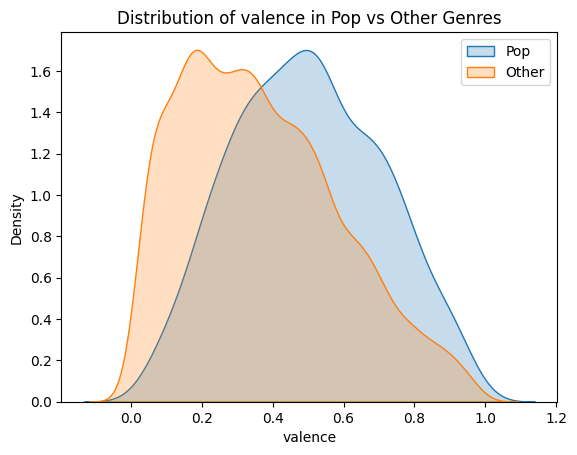

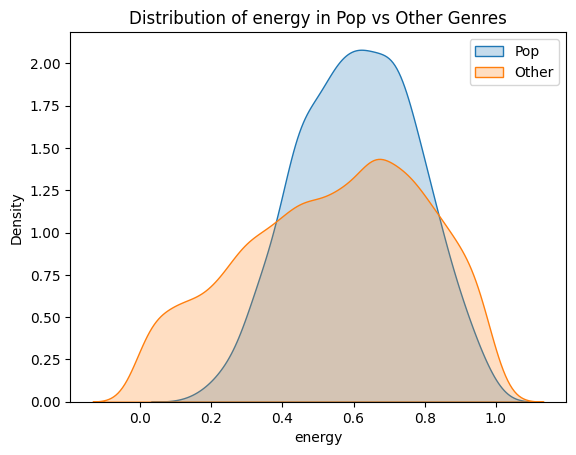

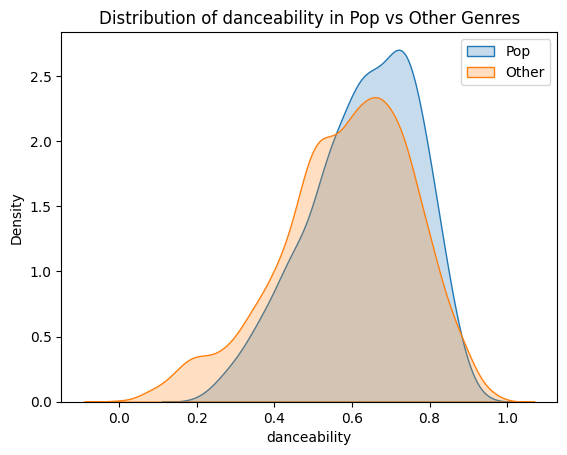

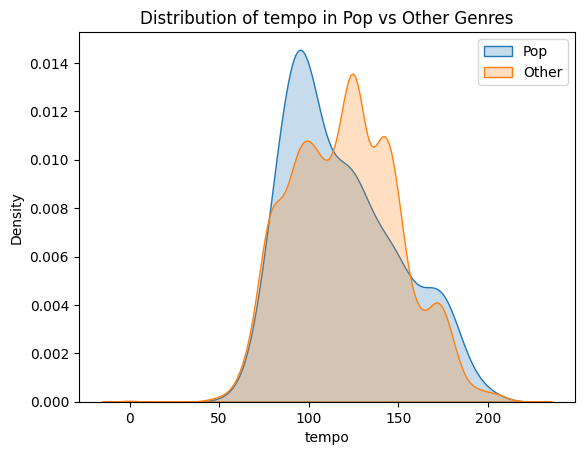

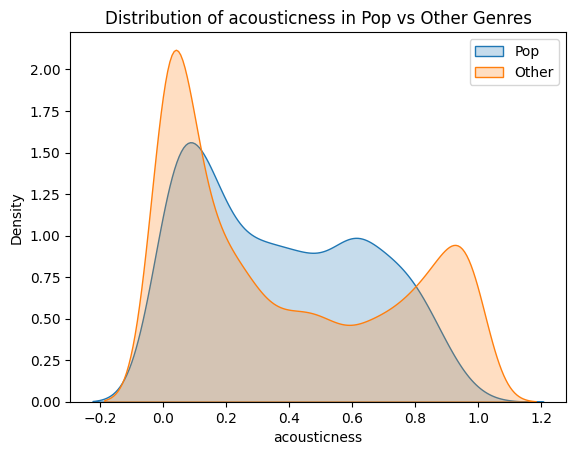

In [13]:
# Pop vs Other Genre Analysis

pop_df = df[df['track_genre'] == 'pop']
non_pop_df = df[df['track_genre'] != 'pop']

features = ['valence', 'energy', 'danceability', 'tempo', 'acousticness']

for col in features:
    sns.kdeplot(pop_df[col], label='Pop', fill=True)
    sns.kdeplot(non_pop_df[col], label='Other', fill=True)
    plt.title(f"Distribution of {col} in Pop vs Other Genres")
    plt.legend()
    plt.show()
